In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option('future.no_silent_downcasting', True)

titanic_data = pd.read_csv('train.csv')

# making  a copied dataset to do correlations on it 


In [2]:
clean_data = titanic_data.copy()
clean_data = clean_data.join(pd.get_dummies(clean_data.Embarked,dtype=int)).drop(['Embarked'],axis=1)
clean_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
clean_data['Sex'] =  clean_data['Sex'].replace(['female','male'],[0,1] )
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


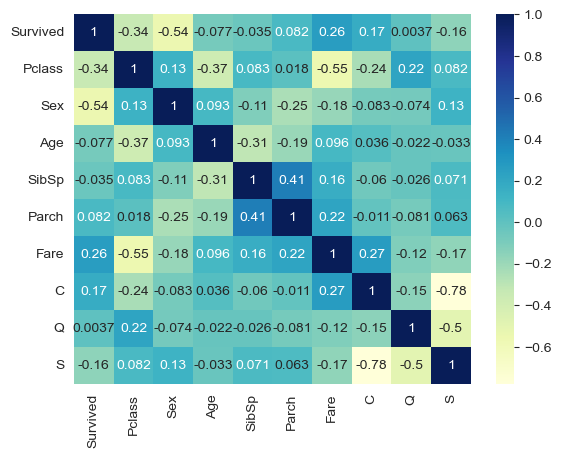

Survived    1.000000
Pclass      0.338481
Sex         0.543351
Name: Survived, dtype: float64

In [3]:
sns.heatmap(clean_data.corr(),annot=True,cmap='YlGnBu')

data = clean_data.corr()['Survived']
data = np.absolute(data)
# data.drop(index=0, inplace=True)
data.sort_values()
plt.show()  #show correlation heat map
data = data[:3]
data  #finding most 3 revelent fetures for next step 

In [6]:
from  sklearn.model_selection import StratifiedShuffleSplit
 #shuffle and split for training model
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index ,test_index in sss.split(clean_data,clean_data[["Survived","Sex","Pclass"]]):
    start_train_set = clean_data.loc[train_index]
    start_test_set = clean_data.loc[test_index]
  

<Axes: >

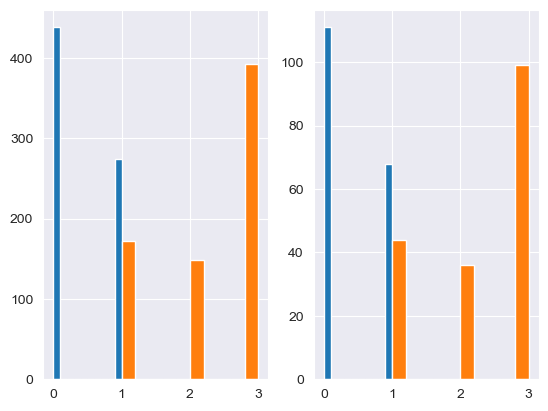

In [11]:
plt.subplot(1,2,1)
start_train_set['Survived'].hist()
start_train_set['Pclass'].hist()
# start_train_set['Sex'].hist()
plt.subplot(1,2,2)
start_test_set['Survived'].hist()
start_test_set['Pclass'].hist()
# start_test_set['Sex'].hist()
